# 11-09_2023 Exam: Association Rules

1. Read the dataset, show its head, shape and description

2. Eliminate totally null columns and totally null rows, eliminate columns with less than 1/3 of non null values; fill the remaining NaN values with the mean of the column (2pt)

3. Drop Time, convert Date from string to datetime and group by Date using mean as aggregate function (2pt)

4. Preparation of the boolean matrix (3pt)

    • Discretise continuous values with two bins, kmeans strategy andonehot-dense encoding
    
    • Discretization/encoding generates 0/1 values; convert the binary values obtained into boolean, as requested by Apriori

5. Set the names of two columns generated by the discretisation of each attribute A to A_low, A_high (with discretisation/one-hot-encoding, each original column generates two columns, the first is for the low values, the second for the high values) (3pt)

6. find a value of min_support such that the Apriori algorithm generates at least 8 frequent itemsets with at least 2 items, output the result (3pt)

7. find the minimum metric threshold such that at least 100 association rules are extracted from the frequent itemsets found and show the metrics used and the best 10 rules by descending confidence and support (3pt)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url = 'AirQualityUCI.csv'

## 1. Read the dataset, show its head, shape and description



In [2]:
df = pd.read_csv(url, sep=';')
df.head()

,Date,Time,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,NaN


In [3]:
print('Dataframe shape: ', df.shape)

Dataframe shape:  (9471, 18)


In [4]:
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15
count,7765.000000,8991.000000,914.000000,9357.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0,0.0
mean,2.127521,1099.833166,218.811816,9.688704,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN,NaN
std,1.463171,217.080037,204.459921,7.559785,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN,NaN
min,0.000000,647.000000,7.000000,0.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN,NaN
25%,1.000000,937.000000,67.000000,4.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN,NaN
50%,1.800000,1063.000000,150.000000,7.900000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN,NaN
75%,2.900000,1231.000000,297.000000,13.600000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN,NaN


## 2. Eliminate totally null columns and totally null rows, eliminate columns with less than 1/3 of non null values; fill the remaining NaN values with the mean of the column (2pt)



In [5]:
print('Dropping totally null rows ({}) and cols ({})..'.format(df.shape[0] - df.dropna(how='all', axis=0).shape[0], df.shape[1] - df.dropna(how='all', axis=1).shape[1]))
df.dropna(how='all', axis=0, inplace=True)
df.dropna(how='all', axis=1, inplace=True)
print('New shape is ', df.shape)

Dropping totally null rows (114) and cols (3)..
New shape is  (9357, 15)


In [6]:
columns_to_drop = []
for i in df.columns:
    if (df[i].dropna().shape[0] < df[i].shape[0]/3):
        columns_to_drop.append(i)
print('Dropping {} columns containing less tha 1/3 of non null values..'.format(len(columns_to_drop)))
df.drop(columns=columns_to_drop, inplace=True)
print('New shape is ', df.shape)

Dropping 1 columns containing less tha 1/3 of non null values..
New shape is  (9357, 14)


In [7]:
for i in df.iloc[:, 2:].columns:
    df[i].fillna(np.mean(df[i].dropna()), inplace=True)

## 3. Drop Time, convert Date from string to datetime and group by Date using mean as aggregate function (2pt)


In [8]:
from datetime import datetime

df.drop(columns='Time', inplace=True)

dates = []
for date in df['Date']:
    day, month, year = date.strip().split('/')
    dates.append(datetime(year=int(year), month=int(month), day=int(day)))
df['Date'] = dates
df.head()

,Date,X00,X01,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [9]:
df.groupby(by=['Date']).mean()
df

,Date,X00,X01,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


## 4. Preparation of the boolean matrix (3pt)

    • Discretise continuous values with two bins, kmeans strategy and onehot-dense encoding

    • Discretization/encoding generates 0/1 values; convert the binary values obtained into boolean, as requested by Apriori



In [10]:
from sklearn.preprocessing import KBinsDiscretizer

n_bins = 2
enc = KBinsDiscretizer(n_bins=n_bins, encode="onehot-dense", strategy='kmeans', dtype=np.float32)
X_binned = enc.fit_transform(df.iloc[:, 1:])
X_binned = X_binned.astype(bool)
X_binned

array([[ True, False, False, ...,  True,  True, False],
       [ True, False, False, ..., False,  True, False],
       [ True, False, False, ...,  True,  True, False],
       ...,
       [ True, False,  True, ..., False,  True, False],
       [ True, False,  True, ..., False,  True, False],
       [ True, False,  True, ..., False,  True, False]])

## 5. Set the names of two columns generated by the discretisation of each attribute A to A_low, A_high (with discretisation/one-hot-encoding, each original column generates two columns, the first is for the low values, the second for the high values) (3pt)



In [11]:
X_boolean = pd.DataFrame(X_binned, columns=[f'{i}_low' if j == 0 else f'{i}_high' for i in df.columns[1:] for j in range(n_bins)])
X_boolean

,X00_low,X00_high,X01_low,X01_high,X03_low,X03_high,X04_low,X04_high,X05_low,X05_high,...,X08_low,X08_high,X09_low,X09_high,X10_low,X10_high,X11_low,X11_high,X12_low,X12_high
0,True,False,False,True,True,False,False,True,True,False,...,False,True,False,True,True,False,False,True,True,False
1,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,True,False
2,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
3,True,False,False,True,True,False,True,False,True,False,...,False,True,False,True,True,False,False,True,True,False
4,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,True,False,True,False,True,False,True,False,True,...,True,False,False,True,False,True,True,False,True,False
9353,True,False,True,False,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,True,False
9354,True,False,True,False,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False
9355,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,False,True,True,False,True,False


## 6. find a value of min_support such that the Apriori algorithm generates at least 8 frequent itemsets with at least 2 items, output the result (3pt)


In [12]:
from mlxtend.frequent_patterns import apriori

min_itemset = 8
min_items_in_itemset = 2
min_support = 0

for support in np.arange(1, 0.01, -0.01):
    print('Trying min_support {:.2f}..'.format(support))
    frequent_itemset = apriori(X_boolean, min_support=support, use_colnames=True)
    itemset_condition = sum([len(itemset) > min_items_in_itemset for itemset in frequent_itemset.itemsets])
    if(itemset_condition > min_itemset):
        min_support = support
        break
if(min_support == 0):
    print('Nothing found!')
else:
    print('min_support: {:.2f} num itemset with {} or more items: {}'.format(min_support, min_items_in_itemset, itemset_condition))

Trying min_support 1.00..
Trying min_support 0.99..
Trying min_support 0.98..
Trying min_support 0.97..
Trying min_support 0.96..
Trying min_support 0.95..
Trying min_support 0.94..
Trying min_support 0.93..
Trying min_support 0.92..
Trying min_support 0.91..
Trying min_support 0.90..
Trying min_support 0.89..
Trying min_support 0.88..
Trying min_support 0.87..
Trying min_support 0.86..
Trying min_support 0.85..
Trying min_support 0.84..
Trying min_support 0.83..
Trying min_support 0.82..
Trying min_support 0.81..
Trying min_support 0.80..
Trying min_support 0.79..
Trying min_support 0.78..
Trying min_support 0.77..
Trying min_support 0.76..
Trying min_support 0.75..
Trying min_support 0.74..
Trying min_support 0.73..
Trying min_support 0.72..
Trying min_support 0.71..
Trying min_support 0.70..
Trying min_support 0.69..
Trying min_support 0.68..
Trying min_support 0.67..
Trying min_support 0.66..
Trying min_support 0.65..
Trying min_support 0.64..
Trying min_support 0.63..
Trying min_s

## 7. find the minimum metric threshold such that at least 100 association rules are extracted from the frequent itemsets found and show the metrics used and the best 10 rules by descending confidence and support (3pt)


In [13]:
from mlxtend.frequent_patterns import association_rules

min_rules = 100
min_metric_threshold = 0

for min_metric in np.arange(20, 0.01, -0.01):
    rules = association_rules(frequent_itemset, metric='lift', min_threshold=min_metric)
    if(len(rules) > min_rules):
        min_metric_threshold = min_metric
        break

if(min_metric_threshold == 0):
    print('Nothing found!')
else:
    print('min_metric_threshold: {:.2f} found {} rules'.format(min_metric_threshold, len(rules)))

min_metric_threshold: 1.20 found 106 rules


In [14]:
rules.sort_values(by=['confidence', 'support'], ascending=False, inplace=True, ignore_index=True)
rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(X04_low),(X03_low),0.639201,0.716469,0.639201,1.000000,1.395734,0.181233,inf,0.785841
1,"(X00_low, X04_low)",(X03_low),0.623704,0.716469,0.623704,1.000000,1.395734,0.176839,inf,0.753479
2,"(X05_low, X04_low)",(X03_low),0.617292,0.716469,0.617292,1.000000,1.395734,0.175021,inf,0.740855
3,"(X05_low, X00_low, X04_low)",(X03_low),0.613658,0.716469,0.613658,1.000000,1.395734,0.173991,inf,0.733887
4,"(X05_low, X04_low)",(X00_low),0.617292,0.804531,0.613658,0.994114,1.235643,0.117028,33.206671,0.498303
5,"(X05_low, X03_low, X04_low)",(X00_low),0.617292,0.804531,0.613658,0.994114,1.235643,0.117028,33.206671,0.498303
6,"(X05_low, X04_low)","(X00_low, X03_low)",0.617292,0.694133,0.613658,0.994114,1.432166,0.185176,51.961451,0.788478
7,"(X05_low, X03_low, X09_low)",(X00_low),0.618147,0.804531,0.613765,0.992911,1.234149,0.116447,27.575380,0.496853
8,"(X05_low, X03_low, X01_low)",(X00_low),0.622208,0.804531,0.617612,0.992614,1.233779,0.117027,26.465544,0.501552
9,"(X05_low, X03_low)",(X00_low),0.682804,0.804531,0.676819,0.991235,1.232065,0.127482,22.300877,0.593812


<Axes: >

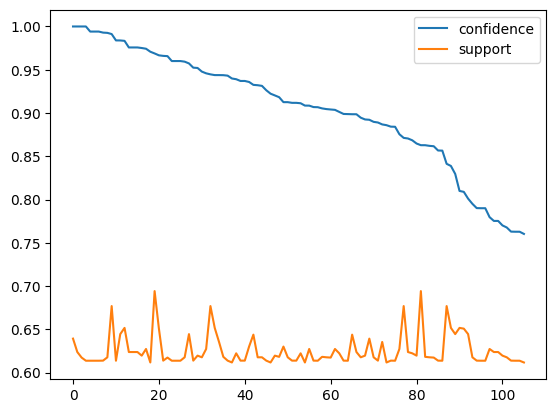

In [15]:
rules[['confidence', 'support']].plot()

<Axes: xlabel='confidence', ylabel='support'>

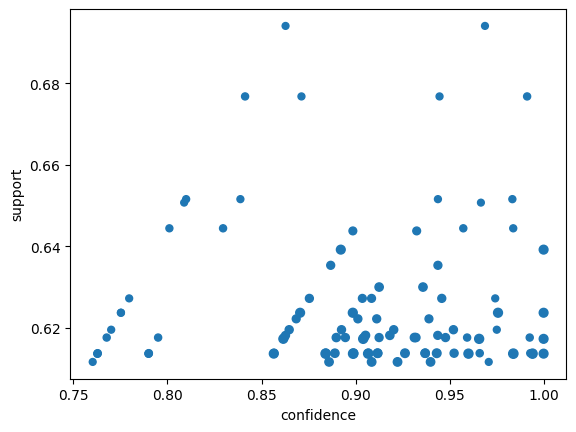

In [16]:
rules.plot.scatter(x='confidence', y='support', s=[14**n for n in rules.lift])
